In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Load the dataset to a Dataframe

In [3]:
df_overtime = pd.read_csv("adp_hackathon_overtime.csv")

In [4]:
df_overtime.shape

(65535, 65)

## Data Pre-processing

In [8]:
df_overtime.isnull().any().sum()

0

In [6]:
df_overtime.head()

,clnt_obj_id,pers_obj_id,mnth_cd,mngr_pers_obj_id,job_cd,work_loc_cd,hr_orgn_id,hr_annl_cmpn_amt,compa_rt,annual_comp_by_exp,...,c_perc_tenured,same_home_work_state,layer,direct_reports,indirect_reports,total_reports,span,regular_hours_autopay,l2_code,is_excess_ot
0,DBFCDCCBE0300BC6,01FGGJK6QR10B6MV,201406,01FGGJK6QR10B6Q5,PA0069,STIPA,402323,152250,NaN,5205.148148,...,32.15,NaN,3.0,2,21,23,NaN,136.0,NAICS_31,0
1,DBFCDCCBE0300BC6,01FGGJK6QR10B6MV,201404,01FGGJK6QR10B6Q5,PA0069,STIPA,402323,152250,NaN,5205.148148,...,32.15,NaN,3.0,2,21,23,NaN,160.0,NAICS_31,0
2,DBFCDCCBE0300BC6,01FGGJK6QR10B6MV,201405,01FGGJK6QR10B6Q5,PA0069,STIPA,402323,152250,NaN,5205.148148,...,32.15,NaN,3.0,2,21,23,NaN,160.0,NAICS_31,0
3,DBFCDCCBE0300BC6,01M8EM4F6WX188HQ,201404,01M8EM4F6WX17Y68,200549,PBDY,130901,42726,NaN,979.044444,...,32.15,NaN,2.0,0,0,0,NaN,170.4,NAICS_31,0
4,DBFCDCCBE0300BC6,01M8EM4F6WX188HQ,201406,01M8EM4F6WX17Y68,200549,PBDY,130901,42726,NaN,979.044444,...,32.15,NaN,2.0,0,0,0,NaN,145.9,NAICS_31,0


In [7]:
df_overtime['same_home_work_state'] = map(lambda:x.replace(np.Nan,'None'),df_overtime['same_home_work_state'])
df_overtime.replace(np.NaN,0,inplace=True)


In [9]:
df_overtime.dtypes

clnt_obj_id                    object
pers_obj_id                    object
mnth_cd                         int64
mngr_pers_obj_id               object
job_cd                         object
work_loc_cd                    object
hr_orgn_id                     object
hr_annl_cmpn_amt                int64
compa_rt                      float64
annual_comp_by_exp            float64
annual_comp_by_tenure         float64
exp_by_tenure                 float64
clnt_bm_annl_cmpn             float64
full_tm_eqv_val               float64
work_asgnmt_stus_dsc           object
full_tm_part_tm_dsc            object
reg_temp_dsc                   object
adp_lens_cd                    object
hr_cmpn_freq_dsc               object
pay_rt_type_dsc                object
martl_stus_dsc                 object
is_manager                     object
flsa_stus_dsc                  object
home_addr_sta_cd               object
work_state_cd                  object
qtrs_since_last_promotion     float64
qtrs_since_l

In [10]:
df_overtime2 = pd.get_dummies(df_overtime, columns = ['clnt_obj_id','pers_obj_id','mngr_pers_obj_id','job_cd','work_loc_cd','hr_orgn_id','work_asgnmt_stus_dsc','full_tm_part_tm_dsc','reg_temp_dsc','adp_lens_cd','hr_cmpn_freq_dsc','pay_rt_type_dsc','martl_stus_dsc','is_manager','flsa_stus_dsc','home_addr_sta_cd','work_state_cd','same_home_work_state','l2_code'])

In [11]:
df_overtime2.head()

,mnth_cd,hr_annl_cmpn_amt,compa_rt,annual_comp_by_exp,annual_comp_by_tenure,exp_by_tenure,clnt_bm_annl_cmpn,full_tm_eqv_val,qtrs_since_last_promotion,qtrs_since_last_job_change,...,work_state_cd_OH,work_state_cd_PA,work_state_cd_SC,work_state_cd_SD,work_state_cd_TN,work_state_cd_TX,work_state_cd_VA,work_state_cd_WA,same_home_work_state_<map object at 0x000002BBF595DCF8>,l2_code_NAICS_31
0,201406,152250,0.0,5205.148148,989.711268,5.259259,161297.0,1.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,1
1,201404,152250,0.0,5205.148148,989.711268,5.259259,161297.0,1.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,1
2,201405,152250,0.0,5205.148148,989.711268,5.259259,161297.0,1.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,1
3,201404,42726,0.0,979.044444,110.418546,8.866667,29976.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,1
4,201406,42726,0.0,979.044444,110.418546,8.866667,29976.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,1


## Exploratory Analysis

In [12]:
df_num = df_overtime2.select_dtypes(include = ['float64','int64'])
df_num.head()

,mnth_cd,hr_annl_cmpn_amt,compa_rt,annual_comp_by_exp,annual_comp_by_tenure,exp_by_tenure,clnt_bm_annl_cmpn,full_tm_eqv_val,qtrs_since_last_promotion,qtrs_since_last_job_change,...,c_perc_managers,c_num_work_states,c_perc_tenured,layer,direct_reports,indirect_reports,total_reports,span,regular_hours_autopay,is_excess_ot
0,201406,152250,0.0,5205.148148,989.711268,5.259259,161297.0,1.0,0.0,0.0,...,23.92,2,32.15,3.0,2,21,23,0.0,136.0,0
1,201404,152250,0.0,5205.148148,989.711268,5.259259,161297.0,1.0,0.0,0.0,...,23.92,2,32.15,3.0,2,21,23,0.0,160.0,0
2,201405,152250,0.0,5205.148148,989.711268,5.259259,161297.0,1.0,0.0,0.0,...,23.92,2,32.15,3.0,2,21,23,0.0,160.0,0
3,201404,42726,0.0,979.044444,110.418546,8.866667,29976.0,1.0,0.0,0.0,...,23.92,2,32.15,2.0,0,0,0,0.0,170.4,0
4,201406,42726,0.0,979.044444,110.418546,8.866667,29976.0,1.0,0.0,0.0,...,23.92,2,32.15,2.0,0,0,0,0.0,145.9,0


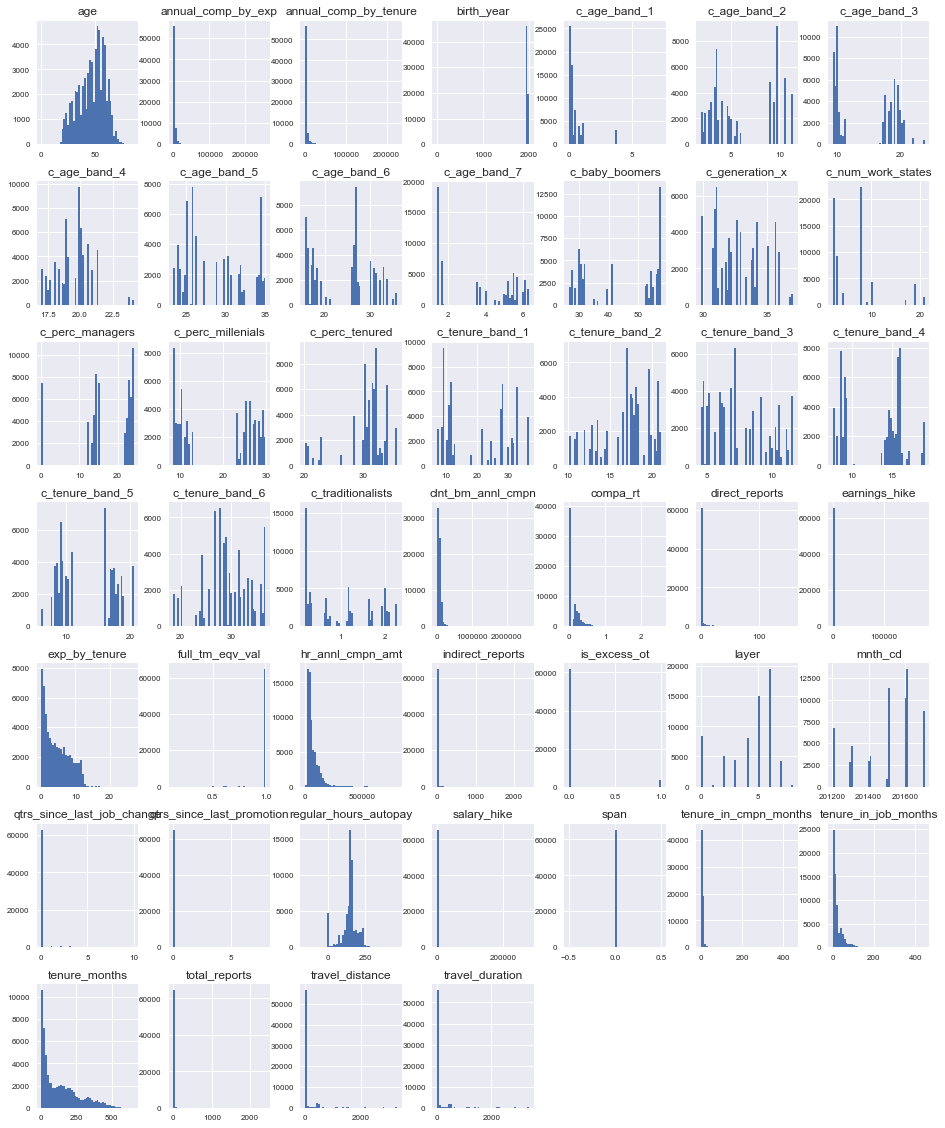

In [13]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

In [14]:
df_num_corr = df_num.corr()['is_excess_ot'][:-1] # -1 because the latest row is Excess Overtime
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with Excess Overtime:\n{}".format(len(golden_features_list), golden_features_list))

There is 0 strongly correlated values with Excess Overtime:
Series([], Name: is_excess_ot, dtype: float64)


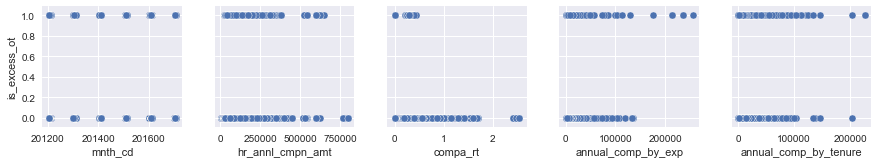

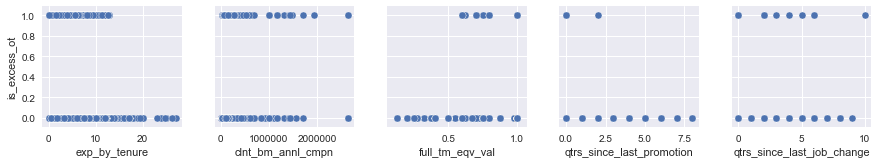

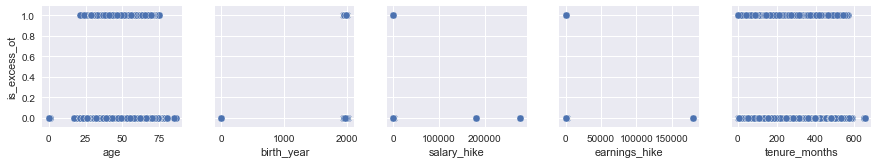

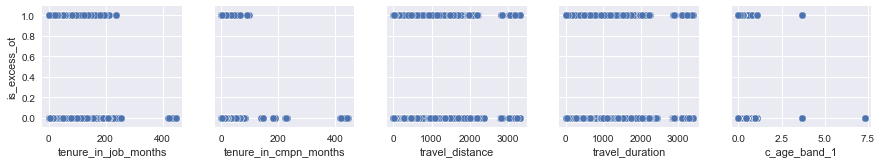

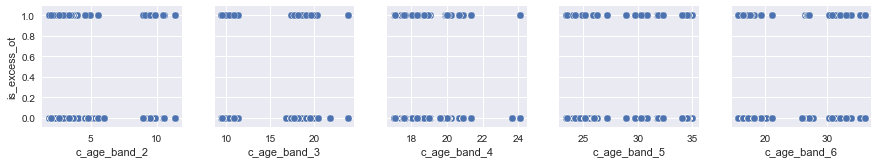

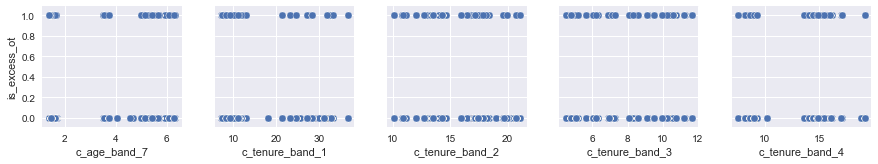

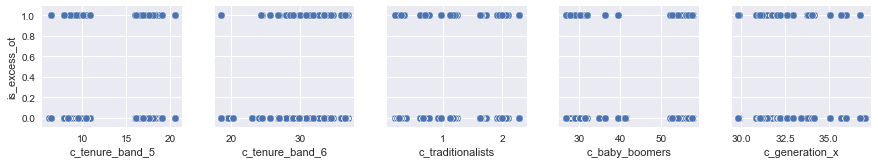

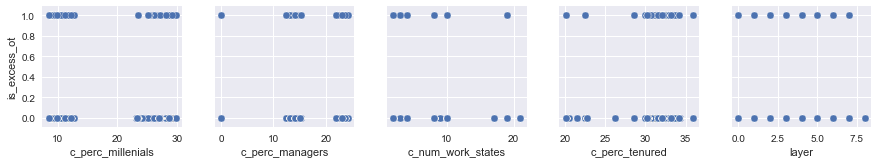

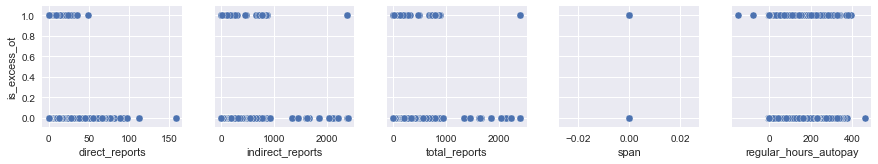

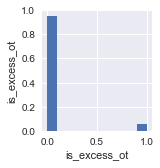

In [15]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['is_excess_ot'])
plt.show()

## Split the dataset into Train and Test data

In [16]:
X = df_overtime2.iloc[:,1:17]
Y = df_overtime2.is_excess_ot

In [17]:
df_overtime2.dtypes

mnth_cd                                                      int64
hr_annl_cmpn_amt                                             int64
compa_rt                                                   float64
annual_comp_by_exp                                         float64
annual_comp_by_tenure                                      float64
exp_by_tenure                                              float64
clnt_bm_annl_cmpn                                          float64
full_tm_eqv_val                                            float64
qtrs_since_last_promotion                                  float64
qtrs_since_last_job_change                                 float64
age                                                        float64
birth_year                                                 float64
salary_hike                                                float64
earnings_hike                                              float64
tenure_months                                                i

In [18]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=4)

In [19]:
X_train.shape

(45874, 16)

In [20]:
X_test.shape

(19661, 16)

In [21]:
Y_train.shape

(45874,)

In [22]:
Y_test.shape

(19661,)

## Build Logistic Regression Model

In [23]:
from sklearn.linear_model import LogisticRegression

logit_model = LogisticRegression()

In [24]:
logit_model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
y_prob = logit_model.predict_proba(X_test)[:,1]
y_pred = np.where(y_prob>0.5,1,0)



C:\Users\suneelnair1\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


## Calculate the metrics

In [26]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(Y_test,y_pred)
print('Confusion Matrix:\n',confusion_matrix)

Confusion Matrix:
 [[18498    63]
 [  966   134]]


In [27]:
from sklearn.metrics import classification_report,accuracy_score

print('Classification report:\n', classification_report(Y_test,y_pred))
print('Accuracy: ',accuracy_score(Y_test,y_pred))

Classification report:
              precision    recall  f1-score   support

          0       0.95      1.00      0.97     18561
          1       0.68      0.12      0.21      1100

avg / total       0.94      0.95      0.93     19661

Accuracy:  0.947662885916


In [28]:
auc_roc = metrics.roc_auc_score(Y_test,y_pred)
print('AUC: ',auc_roc)

AUC:  0.559211984072


In [29]:
from sklearn.metrics import roc_curve,auc

false_positive_rate,true_positive_rate,thresholds = roc_curve(Y_test,y_pred)
roc_auc = auc(false_positive_rate,true_positive_rate)
roc_auc

0.55921198407217487

## Plot the ROC curve

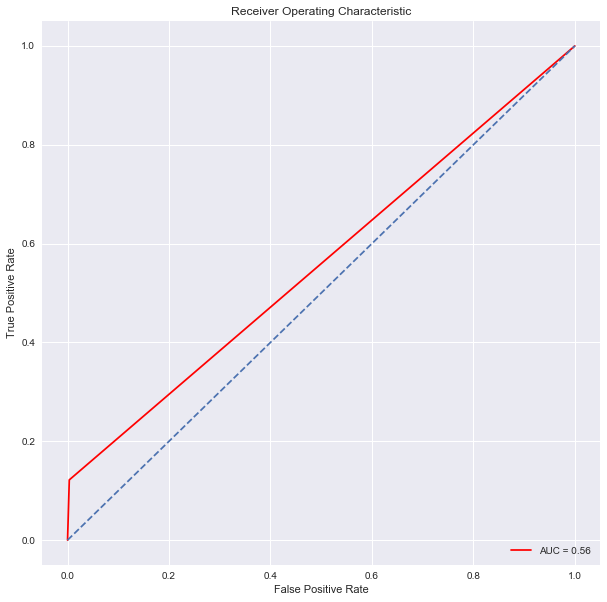

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate,true_positive_rate,color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1], [0,1], linestyle='--')
plt.axis('tight')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()